In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")


## 数据集与加载说明：`fetch_openml('mnist_784')`

### 1. 数据集介绍：MNIST

MNIST（Mixed National Institute of Standards and Technology）是机器学习和计算机视觉领域最经典的图像分类数据集之一：

| 内容   | 描述                         |
| ---- | -------------------------- |
| 样本数量 | 70,000 张图像                 |
| 图像大小 | 28×28 像素的灰度图               |
| 特征数量 | 784（即 28×28 拉平成一维）         |
| 标签   | 数字 0 到 9（共 10 类）           |
| 类型   | 分类任务（digit classification） |

每个图像被展开成一个 784 维向量（784 个像素），其对应标签是图像中表示的数字。


### 2. 函数介绍：`fetch_openml()`

`fetch_openml()` 是 `scikit-learn` 提供的一个数据获取工具，它允许我们从 [OpenML 数据库](https://www.openml.org/) 下载标准公开数据集，常用于快速实验。

sklearn.datasets包含3中类型的函数：fetch_*用来下载数据集，load_*用来加载和sklearn捆绑的小数据集（不需要互联网下载），make_*用于生成假数据集，可用于测试
#### 基本用法：

```python
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
```

| 参数              | 含义                         |
| --------------- | -------------------------- |
| `'mnist_784'`   | OpenML 上 MNIST 数据集的 ID 或名称 |
| `as_frame`      | 是否返回 `pandas.DataFrame` 格式 |
| `parser='auto'` | 自动选择数据解析方式，推荐保留此默认值        |


### 3. 参数说明：`as_frame=False`

* 默认：`as_frame=True` 会将数据以 `pandas.DataFrame` 和 `pandas.Series` 的形式返回。
* 在本例中我们设置 `as_frame=False`，其效果是：

> 返回的数据将是 `NumPy` 数组格式：

### 为什么使用 `as_frame=False`？

* 图像数据是一堆像素值的矩阵，不适合看成结构化的表格

### 返回值说明
数据集作为sklearn.utils.Bunch对象返回，这些对象是字典，键也可以通过属性访问。 "DESCR"数据集的描述，"data"输入数据，"target"标签"

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
# 获取图片特征和分类标签
X, y = mnist.data, mnist.target
X
X.shape
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

有70000张图片，每张图片有784个特征。这是因为每个图像都是28×28像素，每个特征只代表一个像素的强度，从0（白色）到255（黑色）。看一下数据集中的一个数字，需要做的就是获取一个实例的特征向量，将其变形为28×28的数组，并使用Matplotlib的imshow()函数。我们使用cmap="binary"来获得灰度颜色图，其中0是白色，255是黑色：

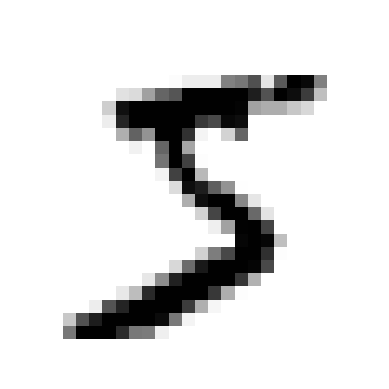

In [6]:
import matplotlib.pyplot as plt

def plot_digit(img_data):
    image = img_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]   # 图像和 y[0]对应
plot_digit(some_digit)
plt.show()

In [5]:
# 随堂练习：利用plt 画前100张手写数字图片， 提示：plt.subplots

In [7]:
# 简单的训练集和测试集分离
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# plt.figure(figsize=(9, 9))
# for idx, image_data in enumerate(X[:100]):
#     plt.subplot(10, 10, idx + 1)
#     plot_digit(image_data)
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.show()

In [8]:
# 随堂练习：根据标签的分布情况，来分层采样测试集; 并验证分离后 维持了原数据的标签分布

训练集已经打乱了，这可以保证所有交叉验证折叠都是相似的（不会在某个折叠丢失数字）。此外，一些算法对训练集的顺序敏感，如果连续获得相似的实例，它们的性能会很差，打乱数据集可以确保不发生这种情况

In [9]:
y_train_5 = y_train == '5'
y_test_5 = y_test == '5'

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="log_loss", random_state=100)   # 使用log损失函数， 随机梯度先将训练
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(loss='log_loss', random_state=100)

In [10]:
# 用来检测是否是数字5
some_digit = X[0]
sgd_clf.predict([some_digit])

array([ True])

todo: 性能测量

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96645, 0.9164 , 0.9581 ])

有时，需要比Scikit-Learn提供的工具更多地控制交叉验证过程。在这些情况下(比如特定的数据划分策略，非标准评估指标），可以自己实现交叉验证

以下代码自己实现交叉验证，与Scikit-Learn的cross_val_score()函数大致相同，它输出相同的结果

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import numpy as np

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)  # 复制了新的模型
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = np.sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96645
0.9164
0.9581


|StratifiedKFold类执行分层采样来生成包含每个类的比率的折叠。在每次迭代中，代码都会创建分类器的克隆，在训练集上训练该克隆，并在测试集上进行预测。然后它计算正确预测的数量并输出正确预测的比率。

In [13]:
# 虚构分类器，把所有分类归为 最频繁出现的类，在这种情况下是阴性类（即非5）
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(np.any(dummy_clf.predict(X_train)))  # 验证 我的预测是不是全部都是阴性，全是阴性->False

False


In [14]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

    虚构分类器精度超过90%！这仅仅是因为只有大约10%的图像是5，所以如果总是猜测图像不是5，那么在90%的情况下都是正确的。

所以精度通常不是分类器的首选性能指标，尤其是当你处理不平衡的数据集时（即，当某些类比其他类出现更频繁时）。评估分类器性能的更好方法是查看混淆矩阵(Confusion Matrix，CM)

混淆矩阵的一般思想是计算所有A/B对的A类实例被分类为B类的次数。例如，要了解分类器将8与0的图像混淆的次数，可以查看混淆矩阵的第8行、第0列。要计算混淆矩阵，首先需要有一组预测值，以便可以将它们与实际目标进行比较。可以对测试集进行预测，但最好暂时保持不变（一旦有一个准备好启动的分类器，只在项目的最后才使用测试集）。作为替代，可以使用cross_val_predict()函数：

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred  # 每个测试折叠的预测 True/False

array([ True, False, False, ...,  True, False, False])

In [16]:
y_train_pred.shape

(60000,)

In [17]:
# 混淆矩阵的numpy写法
# mat_00 = np.sum((y_train_pred == 0) & (y_train_5 == 0))
# mat_01 = np.sum((y_train_pred == 0) & (y_train_5 == 1))
# mat_10 = np.sum((y_train_pred == 1) & (y_train_5 == 0))
# mat_11 = np.sum((y_train_pred == 1) & (y_train_5 == 1))
# arr = np.array([[mat_00, mat_01],
#                 [mat_10, mat_11]])
# print(arr)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[52242,  2337],
       [  844,  4577]], dtype=int64)

混淆矩阵中的每一行代表一个实际类，而每一列代表一个预测类。该矩阵的第一行考虑非5图像（阴性类）：其中52242张被正确分类为非5（称为真阴性），而其余2337张被错误分类为5（假阳性，也称为Ⅰ类错误）。第二行考虑5（阳性类）的图像：844张被错误分类为非5（假阴性，也称为Ⅱ类错误），而其余4577张被正确分类为5（真阳性）。一个完美的分类器只会有真阳性和真阴性，所以它的混淆矩阵只会在它的主对角线上（左上到右下）有非零值：

In [18]:
# 随堂练习：展示一个完美分类预测的 混淆矩阵
y_pred_perfect = y_train_5
confusion_matrix(y_train_5, y_pred_perfect)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

混淆矩阵提供了大量信息，但也需要更简洁的指标。一个指标是阳性预测的精度，这称为分类器的准确率：

$$ 准确率 = TP / (TP+FP) $$

TP是真阳性数，FP是假阳性数。

获得完美准确率的一种简单方法是创建一个始终做出阴性预测的分类器，只对它最有信心的一个实例做出阳性预测。如果这个预测是正确的，那么分类器就有100%的准确率（准确率=1/1=100%）。显然，这样的分类器不会很有用，因为它忽略了除一个阳性实例之外的所有实例。因此，准确率通常与另一个名为召回率的指标一起使用，召回率也称为灵敏度或真阳性率(True Positive Rate，TPR)：这是分类器正确检测到的阳性实例的比率

$$ 召回率 = TP / (TP + FN) $$

FN是假阴性的数量。

In [19]:
# 快速问答：现在的准确率和召回率分别是多少？


In [20]:
# Scikit-Learn提供了几个函数来计算分类器指标，包括准确率和召回率
# precision_score(算的是准确率）
# recall_score(算的是召回率）
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # 4577 / (2377+4577)
recall_score(y_train_5, y_train_pred)   # 4577 / (844+4577)

0.8443091680501752

将准确率和召回率组合成一个称为F1分数的指标通常很方便，尤其是需要一个指标来比较两个分类器时。F1分数是准确率和召回率的调和均值。常规均值对所有值一视同仁，而调和均值则为低值赋予更多权重。因此，如果召回率和准确率都很高，那么分类器会获得较高的F1分数

$$
F_1 = \frac{2}{\frac{1}{\text{精确率}} + \frac{1}{\text{召回率}}} = 2 \times \frac{\text{精确率} \times \text{召回率}}{\text{精确率} + \text{召回率}} = \frac{TP}{\frac{TP + FN + FP}{2}}
$$

In [21]:
# F1 分数
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7421159302796919

F1分数有利于具有相似准确率和召回率的分类器。这并不总是想要的：在某些情况下主要关心准确率，而在其他情况下真正关心召回率。例如，如果训练了一个分类器来检测对孩子安全的视频，你可能更喜欢一个拒绝许多好的视频（低召回率）但只保留安全视频（高准确率）的分类器，而不是一个有很高的召回率，但会让一些非常糟糕的视频出现在你的产品中的分类器（在这种情况下，甚至可能想要添加一个人工流水线来检查分类器的视频选择）。另一种情况，假设训练了一个分类器来检测监控图像中的小偷：如果你的分类器只有30%的准确率，但是只要它有99%的召回率就可能没问题（当然，保安会收到一些误报，但几乎所有的小偷都会被抓住）。

现实不能两者兼顾：提高准确率会降低召回率，反之亦然。这称为准确率/召回率权衡。

 为了理解这种权衡，先看看SGDClassifier是如何做出分类决策的。对于每个实例，它都会根据决策函数计算分数。如果该分数大于阈值，则将实例分配给阳性类，否则分配给阴性类。下图展示了从左侧最低分到右侧最高分的几个数字。假设决策阈值位于中心箭头（两个5之间），你会在该阈值的右侧找到4个真阳性（实际上为5）和1个假阳性（实际上为6）。因此，使用该阈值，准确率为80%(4/5)。但是在6个实际5中，分类器只检测到4个，因此召回率为67%(4/6)。如果你提高阈值（将它移到右边的箭头），假阳性(6)变成真阴性，从而提高了准确率（在这种情况下高达100%），但是一个真阳性变成假阴性，召回率降低到了50%。相反，降低阈值会增加召回率并降低准确率。

![准确率召回率权衡](./images/sklearn_classification/p1.png)

Scikit-Learn不允许直接设置阈值，但可以访问用于预测的决策分数。可以调用它的decision_function()方法，而不是调用分类器的predict()方法，该方法返回每个实例的分数，然后根据这些分数使用你想要的任何阈值进行预测：

In [22]:
import numpy as np
y_scores = sgd_clf.decision_function([some_digit])
y_scores

# z = np.dot(w, x) + b; sigmoid(z) -> 0.5  # z >=0  逻辑回归

print(np.isclose(y_scores, np.dot(sgd_clf.coef_, some_digit) + sgd_clf.intercept_))   # np.dot(w,x) + b  就是 decision_function在做的事情
#
threshold = 0  # 决策阈值
y_some_digit_pred = (y_scores > threshold)

[ True]


In [23]:
# 提高阈值，归为5的标准更加严格，这会降低召回率； 3500以下的也是非5
threshold = 3500
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [24]:
# 用cross_val_predict()函数获取训练集中所有实例的分数，指定要返回决策分数而不是预测：
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  5562.4784773 , -19001.64166195, -26553.99811392, ...,
        12079.38841725,  -7621.61004713, -10265.23583874])

In [25]:
# 算所有可能的阈值的准确率和召回率（该函数添加最后一个为0的准确率和最后一个为1的召回率，对应于负无穷阈值）
# 所有可能的阈值：训练集的所有分数可以从低到高排序，以每个分数为基准（阈值），低于阈值的是非5，高于的是5，计算准确率和召回率
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
precisions
recalls
thresholds

array([-105513.54872909, -101640.93639901, -100969.38144012, ...,
         28032.26565531,   30719.15117833,   30941.41038959])

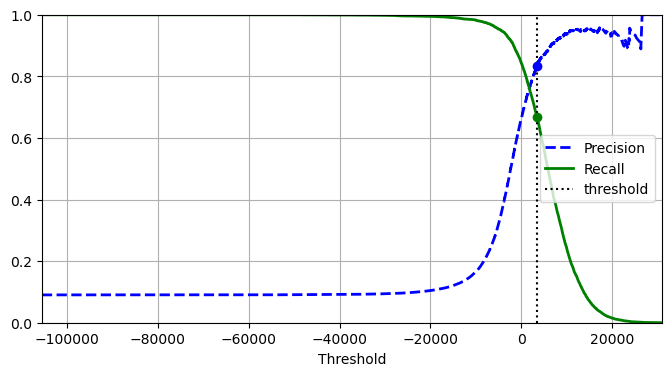

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)  # c="b", linestyle="--"  准确率关于阈值的变化图，应该呈现的是上升趋势
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)   # c="g", linestyle="-" 召回率关于阈值的变化图，一定呈现的是下降趋势
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")   # 在threshold处画一个垂线

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], c="b", marker="o")   # "bo" 可以合并
plt.plot(thresholds[idx], recalls[idx], c="g", marker="o")      # "go" 可以合并
plt.axis([np.min(thresholds), np.max(thresholds), 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

准确率曲线比召回率曲线更曲折。原因是当你提高阈值时，准确率有时会下降（尽管通常它会上升）。回顾之前的例子：阈值右移，准确率从4/5(80%)下降到3/4(75%)（分母和分子会同时下降）。另外，召回率只有在阈值增加时才会下降，这也解释了为什么它的曲线看起来很平滑。

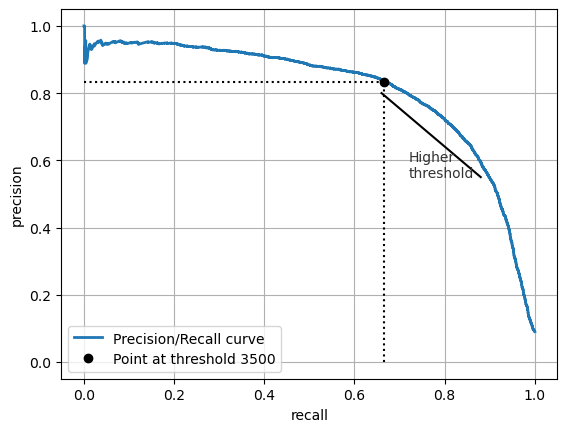

In [27]:
# 选择一个好的准确率/召回率权衡的另一种方法是直接绘制准确率与召回率的关系图
# 随堂练习：不看下面代码，画召回率-准确率关系图

# 召回率-准确率关系图
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], c="black", linestyle=":")  # "k:"可以合并
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3500")

plt.plot((0.66, 0.88), (0.80, 0.55), "k-")  # ^ 上三角形
plt.text(0.72, 0.55, "Higher\nthreshold", color="#333333")
plt.legend(loc="lower left")
plt.xlabel("recall")
plt.ylabel("precision")
plt.grid()
plt.show()

In [28]:
# 假设你决定以90%的准确率为目标。可以使用上图来找到需要使用的阈值，
# 但看图不是很准确 -> 你可以搜索为你提供至少90%准确率的最低阈值
# 随堂练习：找到准确率至少90%的最低阈值

idx_for_90_precision = (precisions >= 0.9).argmax() #    >=0.9为True的最小索引
threshold_for_90_precision = thresholds[idx_for_90_precision]

In [29]:
# 进行预测不用predict，因为模型内部有自己的阈值
y_train_pred_90 = (y_scores > threshold_for_90_precision)

# 检查预测的准确率和召回率
precision_score(y_train_5, y_train_pred_90)
recall_score(y_train_5, y_train_pred_90)

# idx_for_90_precision = (precisions >= 0.9).argmax()
# threshold_for_90_precision = thresholds[idx_for_90_precision]
# threshold_for_90_precision

0.45286847445120826

创建具有高准确率的分类器相当容易：只需设置足够高的阈值。但是这样会导致召回率太低，高准确率分类器就不是很有用！

如果有人要求你：“让我们达到99%的准确率。”你就应该问：“召回率是多少？”

受试者操作特征(Receiver Operating Characteristic，ROC)曲线是二元分类器使用的另一种常用工具。它与准确率/召回率曲线非常相似，但不是绘制准确率与召回率，ROC曲线绘制的是真阳性率（召回率的另一个名称）与假阳性率(False Positive Rate，FPR)。FPR（也称为fall-out）是被错误分类为阳性的阴性实例的比率。它等于1-真阴性率(True Negative Rate，TNR)，即被正确分类为阴性的阴性实例的比率。TNR也称为特异性。因此，ROC曲线绘制了灵敏度（召回率）与1-特异性。

In [30]:
from sklearn.metrics import roc_curve
# precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)   # fpr: 错误分为阳性的阴性比率  1-真阴性率；   tpr：真阳性率，就是召回率

fpr
# tpr

array([0.        , 0.        , 0.        , ..., 0.99853423, 0.99853423,
       1.        ])

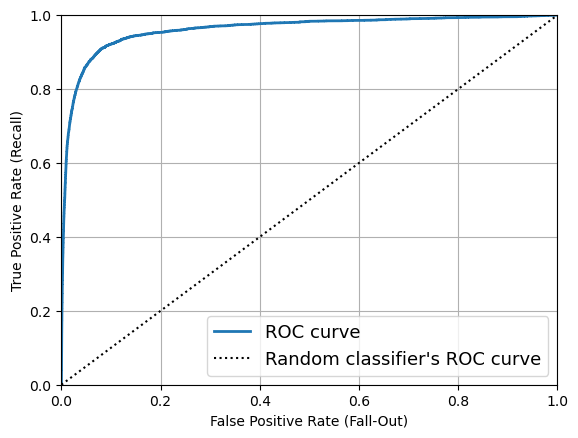

In [31]:
# 这里的阈值列表是降序排列
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()  # 目标：还是锁定准确率90%的点   阈值按降序排列
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]


# 绘制 FPR与TPR的对比图
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")

# 为什么随机分类器的ROC curve是一条直线？
# 试想以下纯随机猜测的混淆矩阵
#  0      1
#0 p     1-p
#1 p     1-p   # p 可以是0到1的数；   recall：（真阳性率） 1-p； 假阳性率：1-p ， 1-p和1-p是一样的

# 假设是一个完美分类器：   假阳性比率是0， 召回率是1
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

再来权衡：召回率（TPR)越高, 假阳性（FPR）越多，上图的虚线是纯随机分类器的ROC曲线，一个好的分类器要仅可能地远离这条线-> 贴近左上角（想象完美分类器，召回率是1，假阳性是0）

-> 贴近左上角的程度可以衡量分类器的好坏 -> 直接去测量曲线下面的面积，面积越接近1，性能越接近完美；面积越接近0.5，性能越不行 -> 曲线下的面积指标名称：AUC(Area Under the Curve)

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9614520950203463

由于ROC曲线与准确率/召回率(Precision/Recall，PR)曲线非常相似，如何决定使用哪一个。根据经验，只要阳性类很少见，或者当你更减少假阳性而不是假阴性时，应该更关注PR曲线。否则，使用ROC曲线。例如，之前的ROC曲线（和ROC AUC分数），可能会认为分类器很好。但这主要是因为与阴性（非5）相比，阳性(5)很少。相比之下，PR曲线清楚地表明分类器还有改进的空间：曲线实际上可以更靠近右上角

创建一个RandomForestClassifier，我们可以将其PR曲线和F1分数与SGDClassifier的那些进行比较

precision_recall_curve()函数需要每个实例的标签和分数，因此需要训练随机森林分类器并让它为每个实例分配一个分数。但是因为工作原理和逻辑回归不一样，RandomForestClassifier类没有decision_function()方法，但它有一个predict_proba()方法可以返回每个实例的类概率，可以只使用阳性类的概率作为分数

In [33]:
# RandomForestClassifier 比较PR曲线和F1分数
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=100)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [34]:
y_probas_forest[:2]

array([[0.18, 0.82],
       [0.99, 0.01]])

In [35]:
y_scores_forest = y_probas_forest[:, 1] # 第二列包含了阳性的概率，所以可以直接把它当成分数，传给precision_recall_curve
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

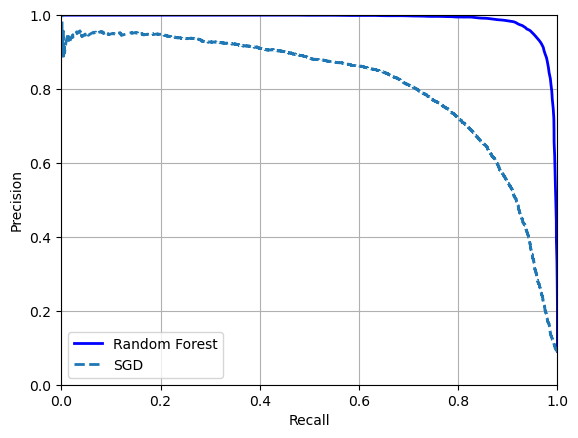

In [36]:
# 绘制随机森林和逻辑回归的 准确率召回率曲线（PR曲线）
import matplotlib.pyplot as plt
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [37]:
# RandomForest Classifier的PR曲线在更右上角 比SGD Classifer更好，
y_train_pred_forest = y_probas_forest[:,1] >= 0.5   # 高于50%概率的归为阳性

#
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
f1_score(y_train_5, y_train_pred_forest)             # 计算F1分数, 0.92
roc_auc_score(y_train_5, y_probas_forest[:,1])       # 计算ROC AUC分数
precision_score(y_train_5, y_train_pred_forest)      # 计算准确率: 98%
recall_score(y_train_5, y_train_pred_forest)         # 计算召回率: 87%

0.8754842280022136

- 总结：
1. 训练二元分类器
2. 合适的指标（类的预测/分数）
3. 交叉验证对验证集预测
4. 选择适合的准确率/召回率权衡，ROC曲线，AUC分数，F1分数等

- 多类分类

多类分类器（也称为多项分类器）可以区分两个以上的类。

一些Scikit-Learn分类器（例如，LogisticRegression、RandomForestClassifier）能够原生地处理多个类。其他的是严格的二元分类器（例如SGDClassifier和SVC）。但是，可以使用多种策略通过多个二元分类器来执行多类分类。

创建一个可以将数字图像分为10类（从0到9）的系统的一种方法是训练10个二进制分类器，每个数字一个（数字0检测器，数字1检测器，数字2检测器，…，数字9检测器）。然后，当想要对图像进行分类时，可以从该图像的每个分类器中获得分数，然后选择分类器输出最高分数的类。这称为一对其余(One-Versus-the-Rest，OvR)策略，有时也称为一对全部(One-Versus-All，OvA)。

一种策略是为每对数字训练一个二元分类器：一个区分0和1，另一个区分0和2，另一个区分1和2，等等。这称为一对一(One-Versus-One，OvO)策略。如果有N个类，则需要训练N×(N-1)/2个分类器。对于MNIST问题，这意味着要训练45个二元分类器！当想要对图像进行分类时，必须通过所有45个分类器运行图像并查看哪个类得到最高分。OvO的主要优点是每个分类器只需要在训练集中包含它必须区分的两个类的部分上进行训练。

一些算法（例如支持向量机分类器）无法适应训练集的大小。对于这些算法，OvO是首选，因为在小训练集上训练许多分类器比在大训练集上训练几个分类器更快。然而，对于大多数二元分类算法，OvR是首选。

Scikit-Learn会检测何时尝试将二元分类算法用于多类分类任务，并根据算法自动运行OvR或OvO。使用sklearn.svm.SVC类用支持向量机分类器来试试这个。只训练前2000个图像，否则运行很久：

In [38]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=100)
svm_clf.fit(X_train[:2000], y_train[:2000]) # 注意这里 y_train已经是多分类了，不是y_train_5这种二元分类，超过了2个类，使用OVO策略训练了45个二元分类器

#
# y_train

SVC(random_state=100)

In [39]:
some_digit = X_train[0]
svm_clf.predict([some_digit])
# svm_clf.decision_function_shape  # 这个只是decision function 返回的shape，默认多分类用OVO处理

array(['5'], dtype=object)

In [40]:
some_digit_scores = svm_clf.decision_function([some_digit])  # 返回10个类的分数：每个类别的分数等于得到最高分的次数 去加/减小调整
some_digit_scores.round(2)

class_id = some_digit_scores.argmax()
class_id
#
svm_clf.classes_   # 目标类列表存储在classes_属性中，按值排序。
svm_clf.classes_[class_id]  # 查找类标签0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

'5'

In [41]:
# 强制使用一对一 或 一对其余
from sklearn.multiclass import OneVsRestClassifier  # 一对其余的分类器

ovr_clf = OneVsRestClassifier(SVC(random_state=100)) # 基于SVC 只用一对其余策略创建多类分类器
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=100))

In [42]:
ovr_clf.predict([some_digit])
ovr_clf.estimators_  # 这里里 有10个SVC 二元分类器
len(ovr_clf.estimators_)  # 检查分类器的数量

10

In [43]:
#  警告：可能运行1分钟以上
# 训练一个多分类的 SGDClassifier
sgd_clf = SGDClassifier(random_state=100)
sgd_clf.fit(X_train, y_train)  # 1对其余，训练10个二元分类器

SGDClassifier(random_state=100)

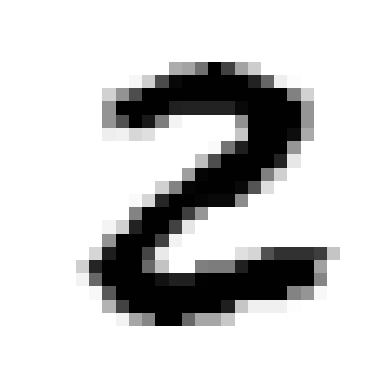

In [44]:
a_digit = X_train[25]
plot_digit(a_digit)

In [45]:
sgd_clf.predict([a_digit]) # 一个预测不对的例子
sgd_clf.decision_function([a_digit]).round()  # 注意：这里的decision_function会为每个类打个分数，在2，8上的分数比较高

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")  # 每个类别中图像数量大致相同，因此可以用精度指标评估; 警告：代码要运行2-3分钟

array([0.8723 , 0.85635, 0.88385])

In [47]:
# 来个缩放预处理
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer

# 特征缩放后可以选择更快的梯度下降，找到的最优解也更好
float_64_convert = FunctionTransformer(lambda X: X.astype(np.float64))
sgd_clf_faster = SGDClassifier(random_state=100, learning_rate="invscaling", eta0=0.1)    # 开始的学习率是0.1， 学习率 = 0.1/迭代次数
scaling_sgd_clf = make_pipeline(float_64_convert, StandardScaler(), sgd_clf_faster)

cross_val_score(scaling_sgd_clf, X_train, y_train, cv=3, scoring="accuracy")  # 又快又好 （快：特征缩放，好：特征缩放+学习率可以选的更激进）

array([0.9074, 0.9056, 0.9122])

真实项目流程复习：探索数据，尝试多个模型，列出最佳模型，使用GridSearchCV/随机搜索微调超参数， 假设找到了最佳模型，看如何通过错误分析去改进它

混淆矩阵现在是10*10，把它弄成彩图更容易分析 -> ConfusionMatrixDisplay.from_predictions

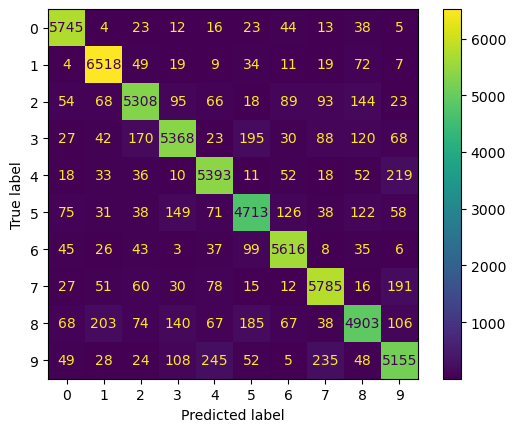

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(scaling_sgd_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

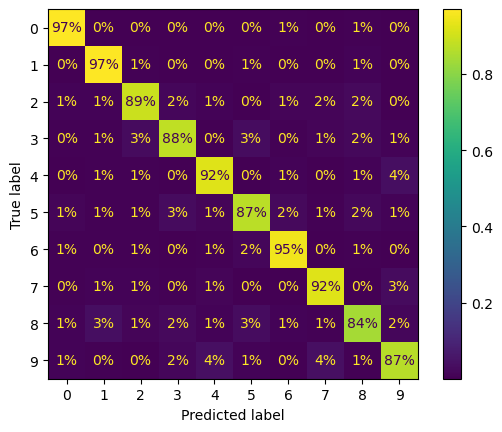

In [49]:
# 数据集上的5更少，还是5可能预测不对？ -> 按行归一化混淆矩阵

#  注意：normalize="true" 是字符串true, 意思是按真实标签来归一化
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")  # values_format=".0%" 显示没有小数的百分比
plt.show()

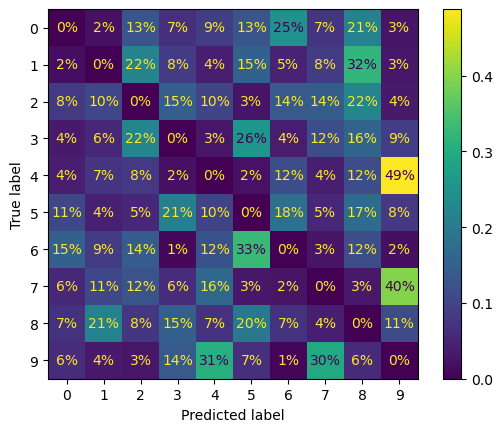

In [50]:
# 把0权重放在正确预测上, 重点强调分类错误,错误更突出
sample_weight = y_train_pred != y_train  #  预测的错误的权重是 True(1), 预测正确的权重是 False(0)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()

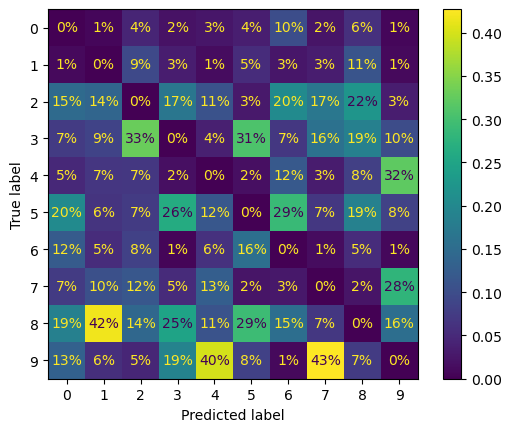

In [51]:
# 混淆矩阵按列归一化，normalize="pred", 按预测来归一化
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="pred", values_format=".0%")
plt.show()

# 可以看出我们的分类器， 4/9, 7/9, 1/8容易分类错误
#                    3/5, 3/2, 5/6容易混淆

分析混淆矩阵的目的：深入了解改进分类器的方法，减少假"x", 为x收集更多数据，计算图片特定的特征数量以区分出来，或者考虑是不是要对图像进行预处理，以凸显某些特征

In [52]:
# 深入了解分类器正在做什么，以及失败原因的好办法：分析单个错误

cl_a, cl_b = '4', '9'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

分类器出错里的数字中（即在左下角和右上角的块中），有的写得非常糟糕，即使是人类也很难对它们进行分类。

然而，大多数错误分类的图像对我们来说似乎是明显的错误，那是因为人的视觉系统在任何信息到达我们的意识之前都会进行大量复杂的预处理。因此，这个错误人看起来明显，并不意味着对分类器来说是这样

使用的是一个简单的SGDClassifier分类，它只是一个线性模型：它所做的只是为每个像素分配每个类的权重，当它看到一个新图像时，它只是将加权像素强度相加以获得每个类的分数。由于数字3和数字5，数字1和数字8仅相差几个像素，因此该模型很容易混淆它们。

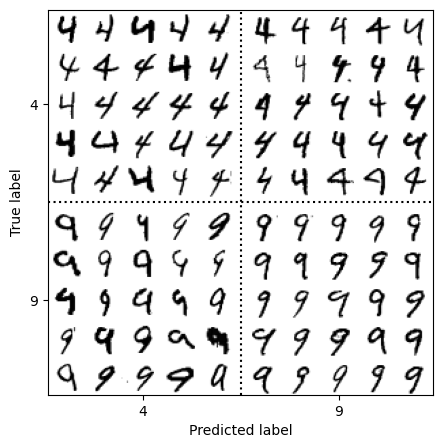

In [53]:
# 两个数字图像 转成混淆矩阵的形式呈现
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])   # 指定两个刻度，对应两个字符串
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])

# 下面两行在画 水平线 和竖直线
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")


plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

数字3和数字5之间的主要区别是连接顶线和底弧的小线的位置。如果绘制一个数字3，并且连接点稍微向左移动，则分类器可能会将其分类为数字5，反之亦然。换句话说，这个分类器对图像的移动和旋转非常敏感。减少3/5混淆的一种方法是对图像进行预处理，以确保它们很好地居中并且不会过度旋转。然而，这较难实现，因为它需要预测每个图像的正确旋转。一种更简单的方法是使用训练图像的轻微移动和旋转变体来扩充训练集。这将迫使模型学会更能容忍这种变化。这称为数据增强

- 多标签分类，为每个实例输出多个分类

在某些情况下，可能希望分类器为每个实例输出多个类。考虑一个人脸识别分类器：如果它在同一张照片中识别出多个人，它应该为它识别的每个人附加一个标签。假设分类器经过训练可以识别三张面孔：Alice、Bob和Charlie。然后，当向分类器显示Alice和Charlie的照片时，它应该输出[True，False，True]（意思是“是Alice，不是Bob，是Charlie”）。这种输出多个二进制标签的分类系统称为多标签分类系统。

In [54]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = y_train >= '7'
y_train_odd = y_train.astype('int8') % 2 == 1
y_multilabel = np.c_[y_train_large, y_train_odd]  # 创建一个y_multilabel数组，数字图像对应 [是否是大数字，是否为奇数]

knn_clf = KNeighborsClassifier()  # K邻近分类器支持多标签分类
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [55]:
knn_clf.predict([some_digit]) # 5
knn_clf.predict([a_digit])    # 2

array([[False, False]])

In [56]:
# 评估多标签分类器的方式：为每个单独标签测量F1分数，然后计算F1分数在所有标签上的平均
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

这种方法假设所有标签都同等重要，但事实可能并非如此。特别是，如果拥有的Alice的照片比Bob或Charlie的照片多得多，可能希望对分类器在Alice照片上的得分赋予更多权重。一个简单的选项是为每个标签赋予与其支持度（即具有该目标标签的实例数）相等的权重。为此，只需在调用f1_score()函数时设置average="weighted"

KNN（K-Nearest Neighbors）用于多标签分类时，对每个标签单独投票，不会学到标签之间的依赖关系：对于每一个测试样本：
1. 找到最近的 k 个邻居。
2. 对这 k 个邻居的标签进行统计（例如 [1, 0, 1, 0, 0]）。
3. 对每一个标签维度分别做“多数投票”，决定是否给该标签打勾（设为1）或不打勾（设为0）。

这种策略很难捕获标签之间的依赖关系。例如，一个大数字（7、8或9）是奇数的可能性是偶数的两倍，但是“奇数”标签的分类器不知道“大”标签的分类器预测的是什么。为了解决这个问题，可以将模型组织成一个链：当一个模型进行预测时，它使用输入特征加上链中在它之前的模型的所有预测。

sklearn有ClassifierChain的类，它可以链接多个分类模型，根据每个模型在链中的位置为其提供适当的标签。ClassifierChain类设置了cv参数后，它将使用交叉验证从每个验证集中的每个实例获得 它们作为验证集时候的 预测，然后这些预测会作为特征 用于训练链中稍后的模型

In [57]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=100)

# self.estimators_ = [clone(self.base_estimator) for _ in range(Y.shape[1])]
# 拟合数据时，会根据标签y的数量 自动链接模型
# 模型预测时，它使用输入特征 加上链中在它之前的模型的所有预测
chain_clf.fit(X_train[:2000], y_multilabel[:2000])
chain_clf.predict([some_digit])

array([[0., 1.]])

- 多输出分类

多标签分类的推广，其中每个标签可以是多类的（即它可以有两个以上的可能值）

例子：从图像中去除噪声，以嘈杂的数字图像作为输入，并且（希望）输出干净的数字图像，表示为像素强度数组

分类器的输出是多标签（每个像素一个标签），每个标签可以有多个值（像素强度范围从0到255）。因此，这是一个多输出分类系统的示例

注意：分类和回归的界限有时比较模糊，比如这个例子预测像素强度更类似于回归，而不是分类。而且多输出系统不限于分类任务，可以每个实例输出包含分类标签和值标签的多个标签

In [58]:
# 多输出-多类分类 - 图像去噪声
np.random.seed(100)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

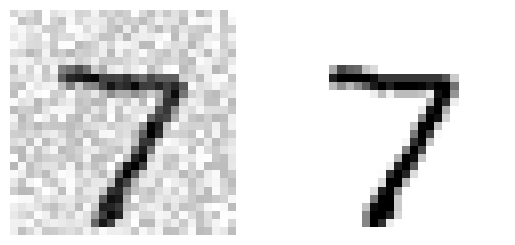

In [59]:
plt.subplot(1,2,1)
plot_digit(X_test_mod[0])
plt.subplot(1,2,2)
plot_digit(y_test_mod[0])
plt.show()

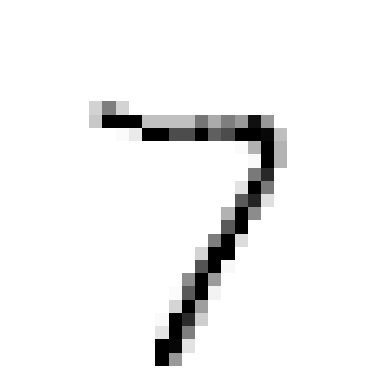

In [60]:
# 训练分类器，并清洗图像。 同样可以用KNN，预测标签（预测每个像素点的像素）时，找到 k个最邻近特征 的像素值（像素分类），投票就行

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()

In [61]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96515, 0.96315, 0.9654 ])

In [63]:
forest_clf.fit(X_train, y_train)
y_test_pred = forest_clf.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)   # 随机森林模型的分类精度是 0.9698
# np.sum(y_test_pred == y_test) / len(y_test_pred)  # numpy的方式计算精度

0.9698

In [67]:
# 随堂练习1： 为MNIST数据集构建分类器，使其能够达到97%以上的精度。 提示：KNeighborsClassifer适合，但要找到好的超参数值（对weights和n_neighbors进行网格搜索）

# TODO

In [68]:
# 随堂练习2：编写一个函数，可以将MNIST图像在任何方向（左、右、上或下）移动一个像素。然后，对于训练集中的每个图像，创建四个移动副本（每个方向一个）并将它们添加到训练集。最后，在这个扩展的训练集上训练你最好的模型，并在测试集上测量它的精度。你应该观察到你的模型现在表现得更好了！这种人工增加训练集的技术称为数据增强或训练集扩展。

# TODO

In [72]:
from scipy.ndimage import shift as scipy_img_shift

In [137]:
print(accuracy_score(forest_clf.predict(X_test), y_test))

0.9783
